In [234]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [235]:
complaints_data = pd.read_csv(r"C:\Users\anshu\Farmlink\farmlink_data.csv")
df = pd.DataFrame(complaints_data)
print(df)

                                     id        status  Sends  Opens  Clicks  \
0      c3bbc3140962170f3cbf11f3d4064b5c  unsubscribed    103     19       1   
1      4952c138fb131d36003b38f742ac2733    subscribed    103     84       2   
2      7244ab4036d24fd2560de91a281485ac    subscribed    113    122       0   
3      ca8f96d7edb2ff654be07db2ebbd98c2    subscribed    112    244       4   
4      e3cd0764e745f7baa17c5b2fb6682fde    subscribed    112     69       0   
...                                 ...           ...    ...    ...     ...   
18367  1aaa8cc332263bd5c2b43d5b33c8831d    subscribed    109    252      19   
18368  fcd682fc8b6786279f5feec131b02b8f    subscribed    103     80      10   
18369  17f59717c69ed9b0e1076d343da875a7    subscribed    104    167       7   
18370  b9a5e29d05e34efd24593da8d5ee52da    subscribed    111     79      10   
18371  bebdec96b3a33381399673e52458ba3a    subscribed     24     36      10   

       lifetodategiving  yeartodategiving  lastgift

C:\Users\anshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Sends', ylabel='yeartodategiving'>

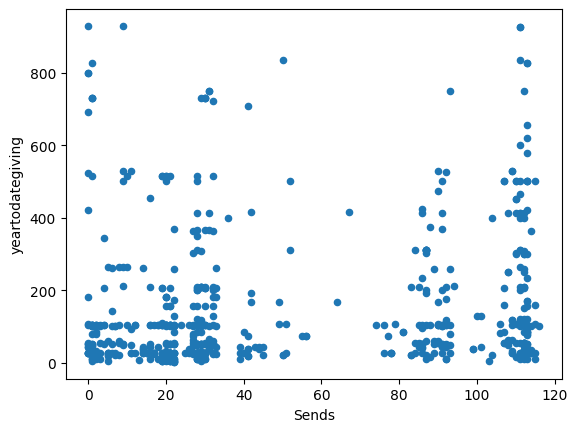

In [236]:
#correlation between number of sends and donation
send_donations  = (df.loc[df['yeartodategiving'] != 0])
send_donations.plot.scatter('Sends', 'yeartodategiving')

dict_values([434850, 127830, 35189])


C:\Users\anshu\AppData\Local\Temp\ipykernel_19844\131808803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_donations['lastgiftdate'] = click_donations['lastgiftdate'].map(lambda x: x.split("/")[2])


<BarContainer object of 3 artists>

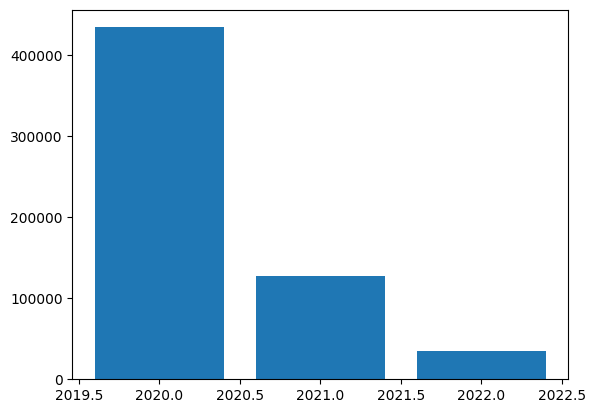

In [237]:
#Sends per year for individuals who donated
click_donations = (df.loc[(df['status'] == 'subscribed') & (df['lastgiftdate'].map(lambda x: isinstance(x, str)))])
click_donations['lastgiftdate'] = click_donations['lastgiftdate'].map(lambda x: x.split("/")[2])

numSends = {2020: click_donations.query("lastgiftdate == '2020'")['Sends'].sum(),
         2021: click_donations.query("lastgiftdate == '2021'")['Sends'].sum(), 2022: click_donations.query("lastgiftdate == '2022'")['Sends'].sum()}
print(numSends.values())
plt.bar(numSends.keys(), numSends.values())

dict_values([510727, 166911, 53512])


<BarContainer object of 3 artists>

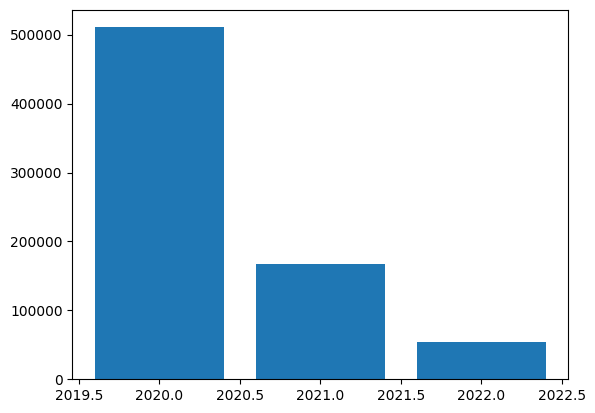

In [238]:
totalDonation = {2020: click_donations.query("lastgiftdate == '2020'")['lastgiftamount'].sum(),
         2021: click_donations.query("lastgiftdate == '2021'")['lastgiftamount'].sum(), 2022: click_donations.query("lastgiftdate == '2022'")['lastgiftamount'].sum()}
print(totalDonation.values())
plt.bar(totalDonation.keys(), totalDonation.values())

dict_keys([2020, 2021, 2022])
dict_values([4463, 1644, 616])


Text(0.5, 1.0, 'Unsubscribed: Total Number of Donors per Year')

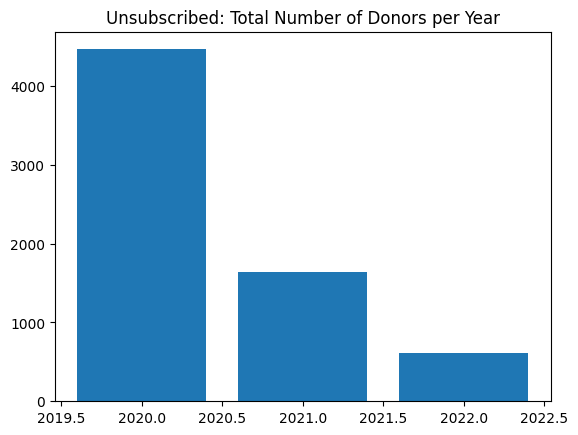

In [239]:
#Number of donors in 2020, 2021, 2022
numPeople = {2020: (click_donations[(click_donations['lastgiftdate'] == '2020')].count()[0]),
         2021: (click_donations[(click_donations['lastgiftdate'] == '2021')].count()[0]),
           2022: (click_donations[(click_donations['lastgiftdate'] == '2022')].count()[0])}

print(numPeople.keys())
print(numPeople.values())
plt.bar(numPeople.keys(), numPeople.values())
plt.title("Unsubscribed: Total Number of Donors per Year")

dict_keys([2020, 2021, 2022])
dict_values([97.43446112480395, 77.75547445255475, 57.125])


Text(0.5, 1.0, 'Unsubscribed: Average Number of Emails per Year')

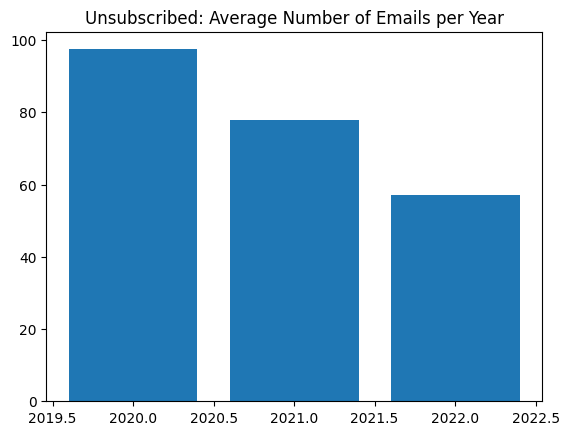

In [240]:
#Number of sends per donor
averageSend = {2020: numSends.get(2020)/numPeople.get(2020),
         2021: numSends.get(2021)/numPeople.get(2021),
           2022: numSends[2022]/numPeople.get(2022)}
print(averageSend.keys())
print(averageSend.values())
plt.bar(averageSend.keys(), averageSend.values())
plt.title("Unsubscribed: Average Number of Emails per Year")

dict_keys([2020, 2021, 2022])
dict_values([114.43580551198745, 101.52737226277372, 86.87012987012987])


Text(0.5, 1.0, 'Unsubscribed: Average Donation Amount Per Year')

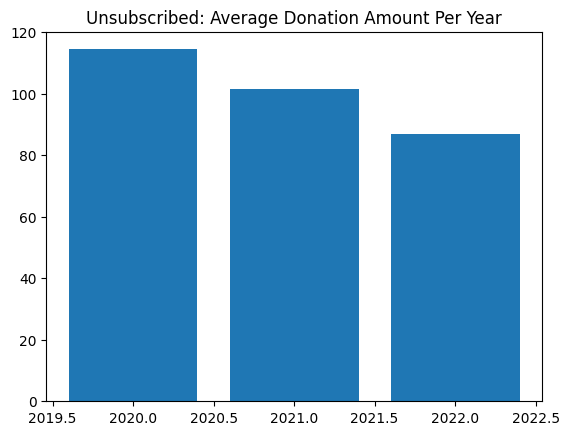

In [241]:
#Average donation amount per year
averageDonation = {2020: totalDonation.get(2020) / numPeople.get(2020), 2021: totalDonation.get(2021) / numPeople.get(2021), 2022: totalDonation.get(2022) / numPeople.get(2022)}
print(averageDonation.keys())
print(averageDonation.values())
plt.bar(averageDonation.keys(), averageDonation.values())
plt.title("Unsubscribed: Average Donation Amount Per Year")

Text(0.5, 1.0, 'Subscribed')

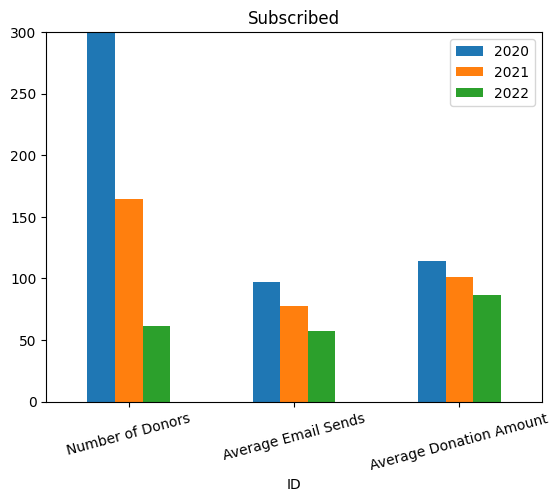

In [242]:
#Cumulative Plot
people = list(map((lambda x : x / 10), list(numPeople.values())))
people.insert(0, "Number of Donors")

sends = list(averageSend.values())
sends.insert(0, "Average Email Sends")

donations = list(averageDonation.values())
donations.insert(0, "Average Donation Amount")

data = [people, sends, donations]
graph = pd.DataFrame(data, columns = ["ID", "2020", "2021", "2022"])
graph.plot(x = "ID", y = ["2020", "2021", "2022"], kind = "bar", ylim=(0, 300), rot = 15)
plt.title("Subscribed")


C:\Users\anshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Sends', ylabel='lastgiftamount'>

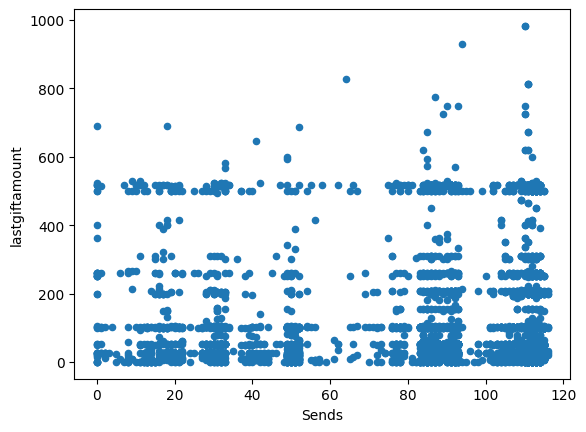

In [243]:
click_donations.plot.scatter('Sends', 'lastgiftamount')

<AxesSubplot: xlabel='Sends', ylabel='Opens'>

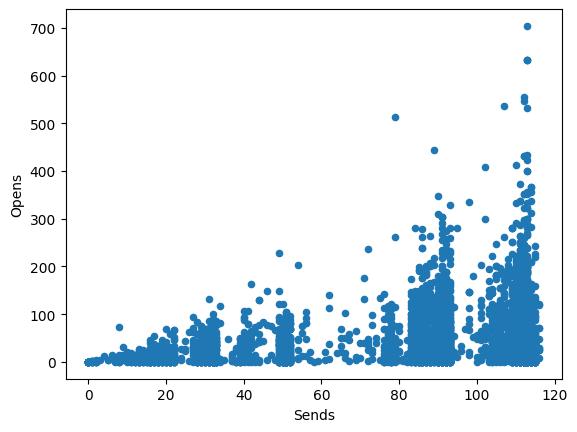

In [244]:
click_donations.plot.scatter('Sends', 'Opens')

<AxesSubplot: xlabel='Opens', ylabel='Clicks'>

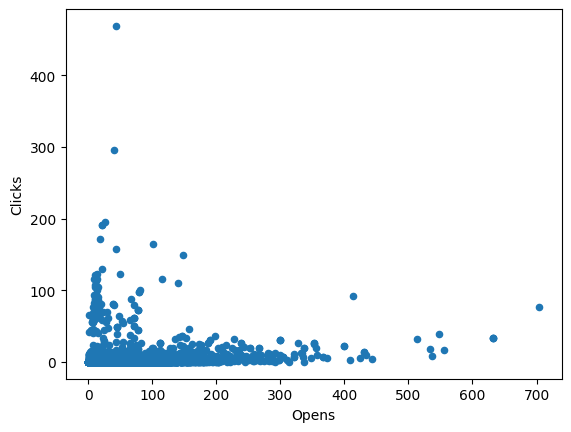

In [245]:
click_donations.plot.scatter('Opens', 'Clicks')

<AxesSubplot: xlabel='Opens', ylabel='lastgiftamount'>

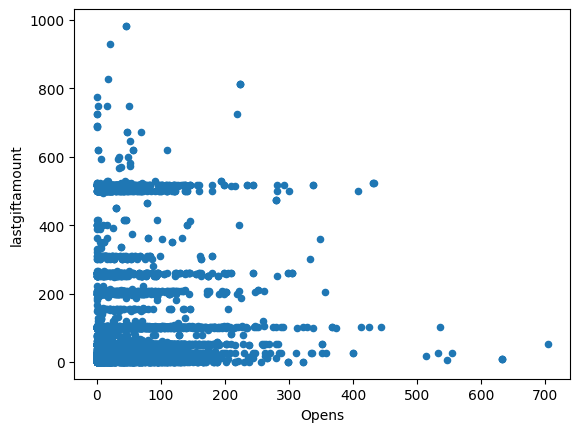

In [246]:
click_donations.plot.scatter('Opens', 'lastgiftamount')

<BarContainer object of 4 artists>

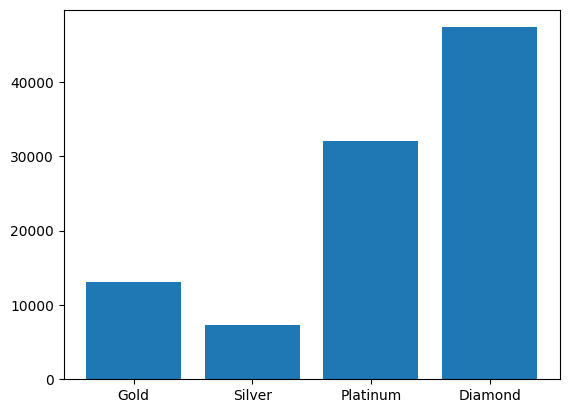

In [247]:
gold = df.query("MonetaryTier == 'Gold'")['yeartodategiving'].sum()
silver = df.query("MonetaryTier == 'Silver'")['yeartodategiving'].sum()
diamond = df.query("MonetaryTier == 'Diamond'")['yeartodategiving'].sum()
platinum = df.query("MonetaryTier == 'Platinum'")['yeartodategiving'].sum()
tier = {'Gold' : gold, 'Silver' : silver, 'Platinum' : platinum, 'Diamond' : diamond}
plt.bar(tier.keys(), tier.values())
#monetary tier donation amounts

<BarContainer object of 2 artists>

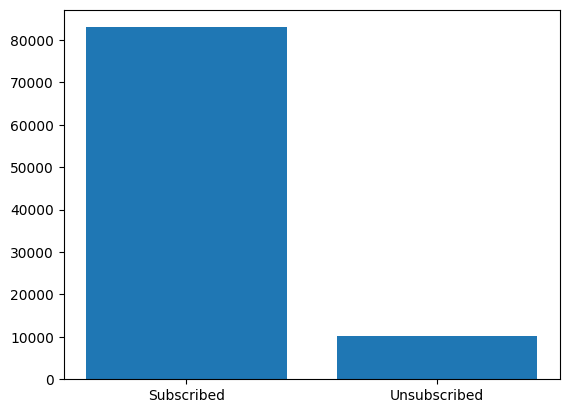

In [248]:
plt.bar(["Subscribed", "Unsubscribed"], [df.query("status == 'subscribed'")['yeartodategiving'].sum(), df.query("status == 'unsubscribed'")['yeartodategiving'].sum()])

<BarContainer object of 2 artists>

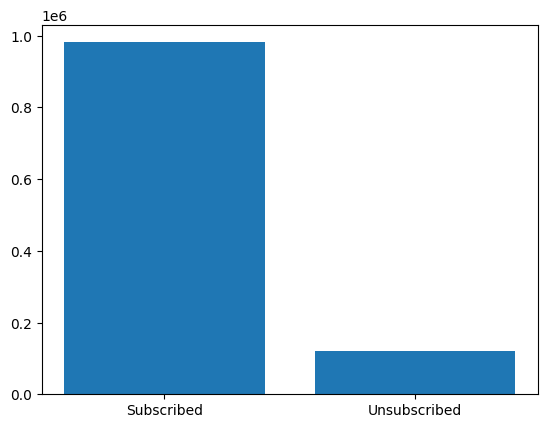

In [249]:
plt.bar(["Subscribed", "Unsubscribed"], [df.query("status == 'subscribed'")['Sends'].sum(), df.query("status == 'unsubscribed'")['Sends'].sum()])